In [ ]:
import keras
print(keras.__version__)

2.9.0


In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 18 kB/s 
     |████████████████████████████████| 439 kB 59.5 MB/s 
     |████████████████████████████████| 1.7 MB 46.6 MB/s 
     |████████████████████████████████| 6.0 MB 34.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import keras
print(keras.__version__)

2.11.0


In [ ]:
#1 zip 파일 압축 해제

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# unzip
import zipfile, os, shutil

# After downloading, modifying google drive path
# /content/gdrive/MyDrive/2022-2/AI/assignment2
dataset = '/content/gdrive/MyDrive/2022-2/AI/Team Project/image.zip'
dst_path = '/content/gdrive/MyDrive/2022-2/AI/Team Project/Image'
dst_file = os.path.join(dst_path, 'image.zip')

if not os.path.exists(dst_path):
  os.makedirs(dst_path)

# copy zip file
shutil.copy(dataset, dst_file)
  
with zipfile.ZipFile(dst_file, 'r') as file:
  file.extractall(dst_path)

Mounted at /content/gdrive


In [ ]:
dst_path = '/content/gdrive/MyDrive/2022-2/AI/Team Project'

In [ ]:
#2 training, validaiton, test data set 나누기

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

In [ ]:
import splitfolders
input_dest = os.path.join(dst_path,'input image')
output_dest = os.path.join(dst_path, 'split image')
splitfolders.ratio(input_dest, output=output_dest, seed=1200, ratio=(.8, .1, .1))

Copying files: 1200 files [00:31, 38.54 files/s]


In [ ]:
train_dir = os.path.join(dst_path, 'split image/train')
test_dir = os.path.join(dst_path, 'split image/test')
val_dir = os.path.join(dst_path, 'split image/val')

train_s_dir = os.path.join(train_dir, "S-Class")
train_e_dir = os.path.join(train_dir, "E-Class")
train_c_dir = os.path.join(train_dir, "C-Class")

test_s_dir = os.path.join(test_dir, "S-Class")
test_e_dir = os.path.join(test_dir, "E-Class")
test_c_dir = os.path.join(test_dir, "C-Class")


val_s_dir = os.path.join(val_dir, "S-Class")
val_e_dir = os.path.join(val_dir, "E-Class")
val_c_dir = os.path.join(val_dir, "C-Class")


print('total training s images:', len(os.listdir(train_s_dir)))
print('total training e images:', len(os.listdir(train_e_dir)))
print('total training c images:', len(os.listdir(train_c_dir)))


print('total validation s images:', len(os.listdir(val_s_dir)))
print('total validation e images:', len(os.listdir(val_e_dir)))
print('total validation c images:', len(os.listdir(val_c_dir)))


print('total test s images:', len(os.listdir(test_s_dir)))
print('total test e images:', len(os.listdir(test_e_dir)))
print('total test c images:', len(os.listdir(test_c_dir)))

total training s images: 320
total training e images: 320
total training c images: 320
total validation s images: 40
total validation e images: 40
total validation c images: 40
total test s images: 40
total test e images: 40
total test c images: 40


In [ ]:
# 이미지 처리용 라이브러리
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 전처리

# 0~1 사이값으로 픽셀값을 변환
train_datagen = ImageDataGenerator(rescale=1./255)
# train data에만 data augmentation 사용
# train_datagen = ImageDataGenerator(rescale=1./255,
                                #    rotation_range=40,
                                #    width_shift_range=0.2,
                                #    height_shift_range=0.2,
                                #    shear_range=0.2,
                                #    zoom_range=0.2,
                                #    horizontal_flip=True,
                                #    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

# 이미지 전처리
# 폴더에 있는 이미지를 전처리
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode='categorical')

Found 960 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [ ]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'C-Class': 0, 'E-Class': 1, 'S-Class': 2}
{'C-Class': 0, 'E-Class': 1, 'S-Class': 2}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.applications import ResNet50
from keras.callbacks import ModelCheckpoint, EarlyStopping
train_dir = os.path.join(dst_path, 'split image/train')

checkpoint_path = os.path.join(dst_path, 'model_{epoch:02d}.hdf5')
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
modelckpt = ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True)
# callback = [earlystop, modelckpt]

# imagenet에 미리 훈련된 ResNet50 모델 불러오기
# model = ResNet50(weights=None,
#                  input_shape=(150, 150, 3), 
#                  pooling=max, 
#                  classes=3)

model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

model.add(Flatten())
#완전 분류기 직전에 dropout 추가하기 (data augmentation 사용했기 때문)
# model.add(Dropout(0.5))
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.5))
# 마지막 dense layer의 크기는 class 개수와 같아야 함
model.add(Dense(units=3, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
from tensorflow.keras import optimizers

# model.compile(loss="categorical_crossentropy",
#               optimizer=optimizers.RMSprop(lr=1e-4),
#               metrics=['acc'])

model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

# model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# !! 데이터 수에 맞춰서 step 수 바꿔야 !!
# steps_per_epoch = len(X_train)//batch_size
# validation_steps = len(X_test)//batch_size # if you have validation data 

In [ ]:
# generator : 제너레이터를 설정
# h1 = model1.fit_generator(generator=train_generator, epochs=10, validation_data=test_generator)
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=48,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=6,
                              callbacks=[earlystop, modelckpt])

<ipython-input-66-42ff569ce3d0>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/10
48/48 [==============================] - ETA: 0s - loss: 1.0955 - acc: 0.3531
Epoch 1: val_acc improved from -inf to 0.47500, saving model to /content/gdrive/MyDrive/2022-2/AI/Team Project/model_01.hdf5
48/48 [==============================] - 78s 2s/step - loss: 1.0955 - acc: 0.3531 - val_loss: 1.0613 - val_acc: 0.4750
Epoch 2/10
48/48 [==============================] - ETA: 0s - loss: 1.0253 - acc: 0.4604
Epoch 2: val_acc improved from 0.47500 to 0.54167, saving model to /content/gdrive/MyDrive/2022-2/AI/Team Project/model_02.hdf5
48/48 [==============================] - 78s 2s/step - loss: 1.0253 - acc: 0.4604 - val_loss: 0.9444 - val_acc: 0.5417
Epoch 3/10
48/48 [==============================] - ETA: 0s - loss: 0.9551 - acc: 0.5031
Epoch 3: val_acc improved from 0.54167 to 0.63333, saving model to /content/gdrive/MyDrive/2022-2/AI/Team Project/model_03.hdf5
48/48 [==============================] - 76s 2s/step - loss: 0.9551 - acc: 0.5031 - val_loss: 0.8768 - val_acc: 0.

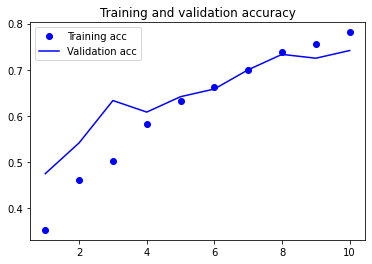

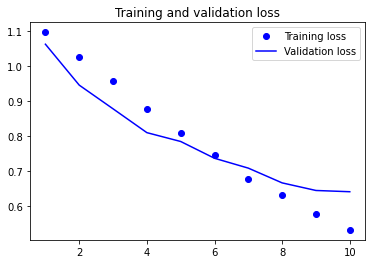

In [ ]:
# import matplotlib.pyplot as plt

# acc = h1.history["acc"]
# val_acc = h1.history["val_acc"]

# plt.plot(range(1, len(acc)+1), acc, label="train_acc")
# plt.plot(range(1, len(acc)+1), val_acc, label="test_acc")
# plt.legend()

import matplotlib.pyplot as plt

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                target_size=(150,150),
                                                batch_size=20,
                                                class_mode='categorical')

Found 120 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
# model_path에서 'model_{epoch:02d}.hdf5' <- 이 파일 명을 마지막 최적 model 파일 이름 명으로 변경해야 함! 
model_path = os.path.join(dst_path, 'model_10.hdf5')
model.load_weights(model_path)
model.evaluate(test_generator)



# model_path = os.path.join(dst_path, 'best model')
# # model.load_weights(model_path)
# model = tf.saved_model.load(model_path)
# model.predeict(test_generator)

6/6 [==============================] - 5s 841ms/step - loss: 0.6920 - acc: 0.6583


[0.6920291781425476, 0.6583333611488342]